<center>
<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-RP0321EN-SkillsNetwork/labs/module_1/images/SN_web_lightmode.png" width="300"> 
</center>

# Assignment: Exploratory Data Analysis with tidyverse and ggplot2
Estimated time needed: 60 minutes


# Introduction and Objectives
In this Lab, you will use an R notebook to perform exploratory data analysis using tidyverse and the ggplot2 R packages. 

You will start by doing some minor data preparation on the SEOUL BIKE SHARING dataset. Then you will generate and explore some statistics from the resulting dataframe and make some observations. Finally, you will generate some informative plots using the ggplot2 library. 

Your primary objective is to gather insights from your exploratory analysis. These findings will be part of your story that you will create your final capstone presentation. 

Visualization is a very powerful tool for better understanding your data and finding patterns that may exist in it. You can use scatterplots, for example, to display how well two features are correlated with, or similar to each other.  When data are highly correlated, it means they vary in similar ways, and so their graphs will look similar (once scaled to a common scale). We can say one variable 'explains' the variation in the other, and that they are 'covariates'. There could be a causal relationship between covariates, meaning that changing one variable has the effect of changing the other, but this need not be the case. Perhaps there is another factor which causes both covariates to respond to variations, or the similarity could be a random coincidence. Either way, the behaviour of one variable can be used to predict the behaviour of the other. The key practical difference is that in the causal case, if we can influence the first variable then we can have a corresponding causal influence on the second. Like turning a light switch on or off to control the light in the room, the state of the switch controls the state of the light bulb. This is an important topic for data science that is beyond our current scope, but we invite you to delve deeper into the subject as you progress in your career$.^{1}$

Other ways visualization can inform your analysis is with spotting outliers and anomalous behaviour in your features. Boxplots are informative in these regards. You can also gain insights about any clear trends and anomalies that may be present in a variable, simply by plotting it directly. For instance, time series and spatial data are particularly interesting kinds of variables. Outliers can easily consume the range of your plot though, making your data look like a featureless flat line in comparison to these points. So some cleaning, namely outlier removal, may be required to get a clearer picture.

A word of caution: be skeptical about any patterns you find, especially in smaller datasets. In very simple terms, it is true that any two points randomly placed in space always define a unique line; but add a third random point, and it is very unlikely that it will land on that same line. This suggests one of the main advantages of 'big data' - any patterns that emerge in very large datasets are far more likely to persist on unseen data than those found in small datasets.

All right, let's move along and get started with our exploratory analysis!



### For reference, we include the Attribute Information for the `seoul_bike_sharing` dataset:

- DATE - format: "2017-12-01"
- RENTED_BIKE_COUNT - Count of bikes rented at each hour
- HOUR - Hour of the day
- TEMPERATURE - Celsius
- HUMIDITY - %
- Windspeed - m/s
- VISIBILITY - 10m
- DEW_POINT_TEMPERATURE - Celsius
- SOLAR_RADIATION - MJ/m2
- RAINFALL - mm
- SNOWFALL - cm
- SEASONS -  "Autumn","Spring",..
- HOLIDAY - "Holiday", "No holiday"
- FUNCTIONING_DAY - "Yes", "No"



## Load the seoul_bike_sharing data into a dataframe

Use the following URL to load your dataset.   
The dataset is already clean, but you will still need to pay careful attention to data types, especially dates, which you may need to coerce. 
Also, ensure any categorical variables get typed as factors. 

```R
seoul_bike_sharing <- "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-RP0321EN-SkillsNetwork/labs/datasets/seoul_bike_sharing.csv"  

```


### Task 1 - Load the dataset
Ensure you read `DATE` as type `character`.
### Solution 1


In [1]:
seoul_bike_sharing <- "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-RP0321EN-SkillsNetwork/labs/datasets/seoul_bike_sharing.csv"  



In [2]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──
✔ ggplot2 3.3.0     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [3]:
seoul_bike_sharing <- "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-RP0321EN-SkillsNetwork/labs/datasets/seoul_bike_sharing.csv"
seoul_bike_sharing <- read_csv(seoul_bike_sharing)

Parsed with column specification:
cols(
  DATE = col_character(),
  RENTED_BIKE_COUNT = col_double(),
  HOUR = col_double(),
  TEMPERATURE = col_double(),
  HUMIDITY = col_double(),
  WIND_SPEED = col_double(),
  VISIBILITY = col_double(),
  DEW_POINT_TEMPERATURE = col_double(),
  SOLAR_RADIATION = col_double(),
  RAINFALL = col_double(),
  SNOWFALL = col_double(),
  SEASONS = col_character(),
  HOLIDAY = col_character(),
  FUNCTIONING_DAY = col_character()
)


### Task 2 - Recast `DATE` as a date
Use the format of the data, namely "%d/%m/%Y".
### Solution 2


In [4]:
seoul_bike_sharing$DATE<-as.Date(seoul_bike_sharing$DATE, format="%d/%m/%Y")

In [5]:
head(seoul_bike_sharing)

DATE,RENTED_BIKE_COUNT,HOUR,TEMPERATURE,HUMIDITY,WIND_SPEED,VISIBILITY,DEW_POINT_TEMPERATURE,SOLAR_RADIATION,RAINFALL,SNOWFALL,SEASONS,HOLIDAY,FUNCTIONING_DAY
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0,0,0,Winter,No Holiday,Yes
2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0,0,0,Winter,No Holiday,Yes
2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0,0,0,Winter,No Holiday,Yes
2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0,0,0,Winter,No Holiday,Yes
2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0,0,0,Winter,No Holiday,Yes
2017-12-01,100,5,-6.4,37,1.5,2000,-18.7,0,0,0,Winter,No Holiday,Yes


### Task 3 - Cast `HOURS` as a categorical variable
Also, coerce its levels to be an ordered sequence.  This will ensure your visualizations correctly utilize `HOURS` as a discrete variable with the expected ordering.  
### Solution 3


In [6]:
seoul_bike_sharing$HOUR <- factor(seoul_bike_sharing$HOUR, ordered = TRUE)

### Check the structure of the dataframe


In [7]:
str(seoul_bike_sharing)

tibble [8,465 × 14] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ DATE                 : Date[1:8465], format: "2017-12-01" "2017-12-01" ...
 $ RENTED_BIKE_COUNT    : num [1:8465] 254 204 173 107 78 100 181 460 930 490 ...
 $ HOUR                 : Ord.factor w/ 24 levels "0"<"1"<"2"<"3"<..: 1 2 3 4 5 6 7 8 9 10 ...
 $ TEMPERATURE          : num [1:8465] -5.2 -5.5 -6 -6.2 -6 -6.4 -6.6 -7.4 -7.6 -6.5 ...
 $ HUMIDITY             : num [1:8465] 37 38 39 40 36 37 35 38 37 27 ...
 $ WIND_SPEED           : num [1:8465] 2.2 0.8 1 0.9 2.3 1.5 1.3 0.9 1.1 0.5 ...
 $ VISIBILITY           : num [1:8465] 2000 2000 2000 2000 2000 ...
 $ DEW_POINT_TEMPERATURE: num [1:8465] -17.6 -17.6 -17.7 -17.6 -18.6 -18.7 -19.5 -19.3 -19.8 -22.4 ...
 $ SOLAR_RADIATION      : num [1:8465] 0 0 0 0 0 0 0 0 0.01 0.23 ...
 $ RAINFALL             : num [1:8465] 0 0 0 0 0 0 0 0 0 0 ...
 $ SNOWFALL             : num [1:8465] 0 0 0 0 0 0 0 0 0 0 ...
 $ SEASONS              : chr [1:8465] "Winter" "Winter" "Winter" "Winter" .

### Finally, ensure there are no missing values


In [8]:
sum(is.na(seoul_bike_sharing))

[1] 0

## Descriptive Statistics

Now you are all set to take a look at some high level statistics of the `seoul_bike_sharing` dataset. 


### Task 4 - Dataset Summary
Use the base R `sumamry()` function to describe the `seoul_bike_sharing` dataset.

### Solution 4


In [9]:
summary(seoul_bike_sharing)

      DATE            RENTED_BIKE_COUNT      HOUR       TEMPERATURE    
 Min.   :2017-12-01   Min.   :   2.0    7      : 353   Min.   :-17.80  
 1st Qu.:2018-02-27   1st Qu.: 214.0    8      : 353   1st Qu.:  3.00  
 Median :2018-05-28   Median : 542.0    9      : 353   Median : 13.50  
 Mean   :2018-05-28   Mean   : 729.2    10     : 353   Mean   : 12.77  
 3rd Qu.:2018-08-24   3rd Qu.:1084.0    11     : 353   3rd Qu.: 22.70  
 Max.   :2018-11-30   Max.   :3556.0    12     : 353   Max.   : 39.40  
                                        (Other):6347                   
    HUMIDITY       WIND_SPEED      VISIBILITY   DEW_POINT_TEMPERATURE
 Min.   : 0.00   Min.   :0.000   Min.   :  27   Min.   :-30.600      
 1st Qu.:42.00   1st Qu.:0.900   1st Qu.: 935   1st Qu.: -5.100      
 Median :57.00   Median :1.500   Median :1690   Median :  4.700      
 Mean   :58.15   Mean   :1.726   Mean   :1434   Mean   :  3.945      
 3rd Qu.:74.00   3rd Qu.:2.300   3rd Qu.:2000   3rd Qu.: 15.200      
 Max

### Some Basic Observations:
- We can see from `DATE` that we have exactly a full year of data.  
- No records have zero bike counts.  
- Spring and Winter have the same count of records, while autumn has the least and Summer has the most.
- Temperature has a large range, so we might expect it to explain at least some of the variation in bike rentals.  
- Precipitation seems to be quite rare, only happening in the fourth quartiles for both `RAINFALL` and `SNOWFALL`.
- The average `WINDSPEED` is very light at only 1.7 m/s, and even the maximum is only a moderate breeze (Google 'Beaufort Wind Scale' to find the different wind descriptions)  

By now, you might agree that Exploratory Data Analysis can create more questions than answers. That's okay - you'll have a much deeper understanding and appreciation for your data as a result! 


### Task 5 - Based on the above stats, calculate how many Holidays there are.
### Solution 5:


In [10]:
count(filter(seoul_bike_sharing['HOLIDAY'], HOLIDAY=='Holiday'))/24

n
<dbl>
17


### Task 6 - Calculate the percentage of records that fall on a holiday.
### Solution 6


In [11]:
# provide your solution here
(count(filter(seoul_bike_sharing['HOLIDAY'], HOLIDAY=="Holiday" ))/count(seoul_bike_sharing))*100 

n
<dbl>
4.819846


### Task 7 - Given there is exactly a full year of data, determine how many records we expect to have.
### Solution 7


In [12]:
# provide your solution here
365*24

[1] 8760

### Task 8 - Given the observations for the 'FUNCTIONING_DAY' how many records must there be?
### Solution 8


In [13]:
# provide your solution here
count(seoul_bike_sharing['FUNCTIONING_DAY'])

n
<int>
8465


## Drilling Down
Let's calculate some seasonally aggregated measures to help build some more context.  
### Task 9 - Load the dplyr package, group the data by `SEASONS`, and use the `summarize()` function to calculate the seasonal total rainfall and snowfall.
### Solution 9


In [14]:
# provide your solution here
install.packages("dplyr")
library(dplyr)
                 

also installing the dependencies ‘cli’, ‘lifecycle’, ‘pillar’, ‘rlang’, ‘tibble’, ‘tidyselect’, ‘vctrs’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [15]:
seoul_bike_sharing %>% group_by (SEASONS) %>% summarize(RAINFALL = sum(RAINFALL), SNOWFALL = sum(SNOWFALL))

SEASONS,RAINFALL,SNOWFALL
<chr>,<dbl>,<dbl>
Autumn,227.9,123.0
Spring,403.8,0.0
Summer,559.7,0.0
Winter,70.9,534.6


Wow, that seems like a lot of snow.  
Now that you have some ideas about what sorts of questions can be answered through descriptive statistics, let's start visualizing the data.  


## Data Visualization

Let's take a closer look at our main variable of interest, namely, `RENTED_BIKE_COUNT`.  
Think of this variable as the key _measure_ or _dependent variable_ in your analysis.  

Indeed, it is a measured quantity, and we expect it to depend on factors such as the expected weather.  
Evidently, if the immediate or forecasted weather is harsh or unpleasant, many people could choose to use alternate transit or simply wait for better weather rather than rent a bike.   
On the other hand, many people may be inspired to ride under pleasant expected weather conditions.  

The weather is largely infuenced by the time of day and the seasons, so these are also factors.  
The time of day, the day of week, and Holidays all matter because they control commuting schedules.  

Finer granularity data such as a unique ID for each bike and/or rider, when and where each bike was rented, or even finer - a history of when and where each bike was used or idle - would be interesting as well.


### Load the ggplot2 package so we can generate some data visualizations.


In [16]:
# provide your solution here
library("ggplot2")

Our variable of interest is a time series, so why not start by taking a look at it in it's natural form?

### Task 10 - Create a scatter plot of `RENTED_BIKE_COUNT` vs `DATE`. 
Tune the opacity using the `alpha` parameter such that the points don't obscure each other too much.
### Solution 10


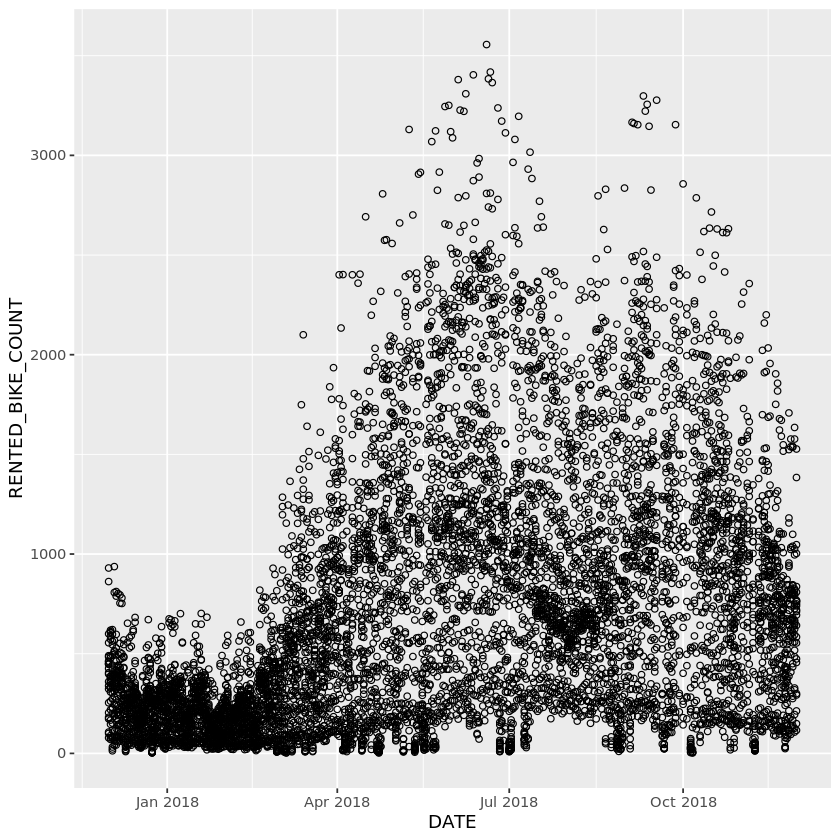

In [17]:
ggplot(seoul_bike_sharing, aes(y= RENTED_BIKE_COUNT, x=DATE), alpha = 0.5) +
       geom_point(shape =1)

In [18]:
-Rentals peaked in June, and had very high usage in September also.
-The lowest number of bikes rented occurred between December and March, when it's the coldest.
-Rental trends were more stably low during these months, but usage was more spread out during the summer and fall months.

ERROR: Error in parse(text = x, srcfile = src): <text>:1:10: unexpected symbol
1: -Rentals peaked
             ^


### Ungraded Task: We can see some patterns emerging here.
Describe them and keep your findings for your presentation in the final project.


### Solution


#### provide your solution here


### Using colour
Let's see if we can enhance some of these features by incorporating colour. Given our observations so far, `HOURS` is a great candidate for this task.  

### Task 11 - Create the same plot of the `RENTED_BIKE_COUNT` time series, but now add `HOURS` as the colour.
### Solution 11


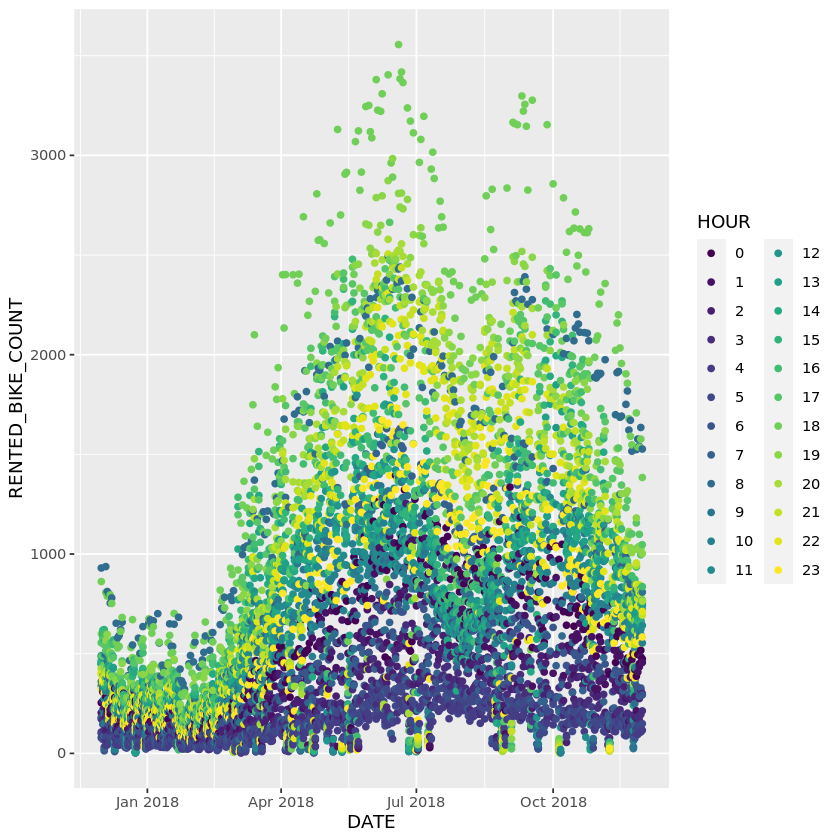

In [19]:
# provide your solution here
ggplot(seoul_bike_sharing, aes(y= RENTED_BIKE_COUNT, x=DATE), alpha = 0.5) +
       geom_point(aes(color = HOUR))

### Ungraded Task: The trends are much more clear now. 
Describe them and keep your findings for your presentation in the final project.


### Solution


#### provide your solution here
-In the summer, the highest numbers of bikes are rented in the evening hours.  During this time of year, people also tend to rent bikes at night before midnight as the second most popular time.
-Throughout the year, it appears that the very early morning hours are when the fewest bikes are rented out, which is no surprise.
-One feature that stands out is the single blue dots of high usage in the warm months, and of highest usage in the cold months.  This is likely bikes being used for morning work commutes; likewise, there are similar numbers of green dots, which are probably the evening commute bikes.

## Distributions


### Task 12 - Create a histogram overlaid with a kernel density curve
Normalize the histogram so the y axis represents 'density'. This can be done by setting `y=..density..` in the aesthetics of the histogram.


<details><summary>Click here for a hint</summary>
Set the colour to something like black and the fill to white so you can see the kernel density plot layer better.


<details><summary>Click here for another hint</summary>
Set the color and alpha such that your denstiy plot is clearly visible, without obscuring the histogram. 


### Solution 12


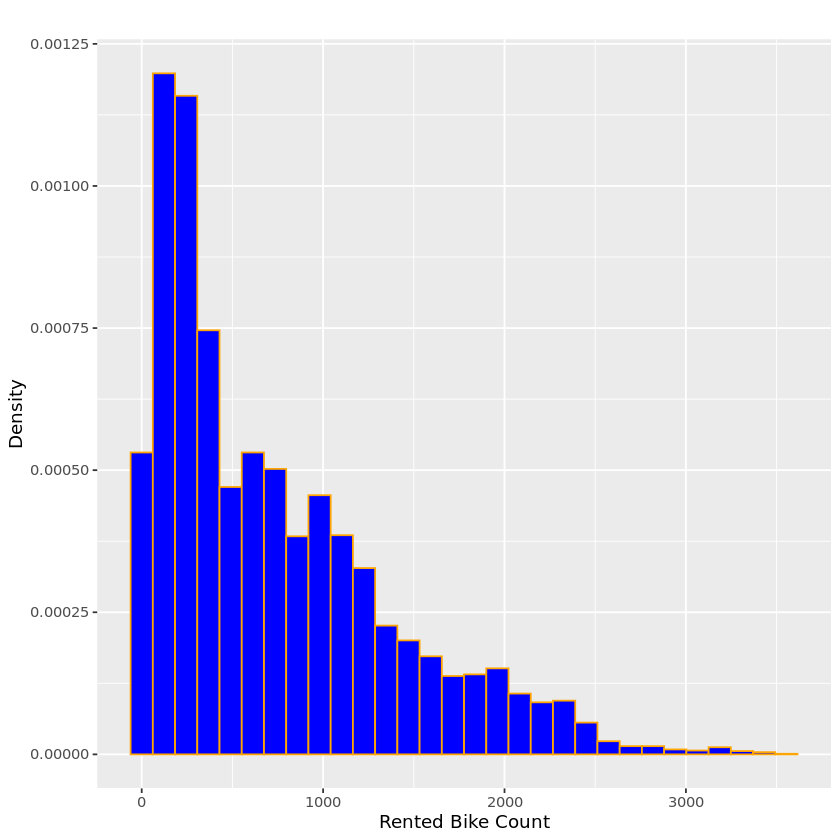

In [20]:
ggplot(data = seoul_bike_sharing, aes(x = RENTED_BIKE_COUNT, y = ..density..), alpha = 0.5) +
  geom_histogram(bins = 30, fill = "blue", color = "orange") +
  labs(
    title = "",
    x = "Rented Bike Count",
    y = "Density")


### Ungraded Task: Describe the main features you see in your plot.
Consider what it's shape tells you, and keep your findings for your presentation in the final project. 


In [21]:
There are often low numbers of bikes rented.  The mode is about 200-300 bikes at a time.

The drop off in bike count includes little bumps in the rental numbers, indicating possible subgroups of the dataset. 

The data being skewed to the right indicates that there are occasions when very high numbers of bikes are rented.

ERROR: Error in parse(text = x, srcfile = src): <text>:1:7: unexpected symbol
1: There are
          ^


<details><summary>Click here for a solution</summary>
    
We can see from the histogram that most of the time there are relatively few bikes rented. Indeed, the 'mode', or most frequent amount of bikes rented, is about 250.  

Judging by the 'bumps' at about 700, 900, and 1900, and 3200 bikes, it looks like there may be other modes hiding within subgroups of the data. 

Interestingly, judging from the tail of the distribution, on rare occasions there are many more bikes rented out than usual.


## Correlation between two variables (scatter plot)
### Task 13 - Use a scatter plot to visualize the correlation between `RENTED_BIKE_COUNT` and `TEMPERATURE` by `SEASONS`.
Start with `RENTED_BIKE_COUNT` vs. `TEMPERATURE`, then generate four plots corresponding to the `SEASONS` by adding a `facet_wrap()` layer.
Also, make use of colour and opacity to emphasize any patterns that emerge. Use `HOUR` as the color.

### Solution 13


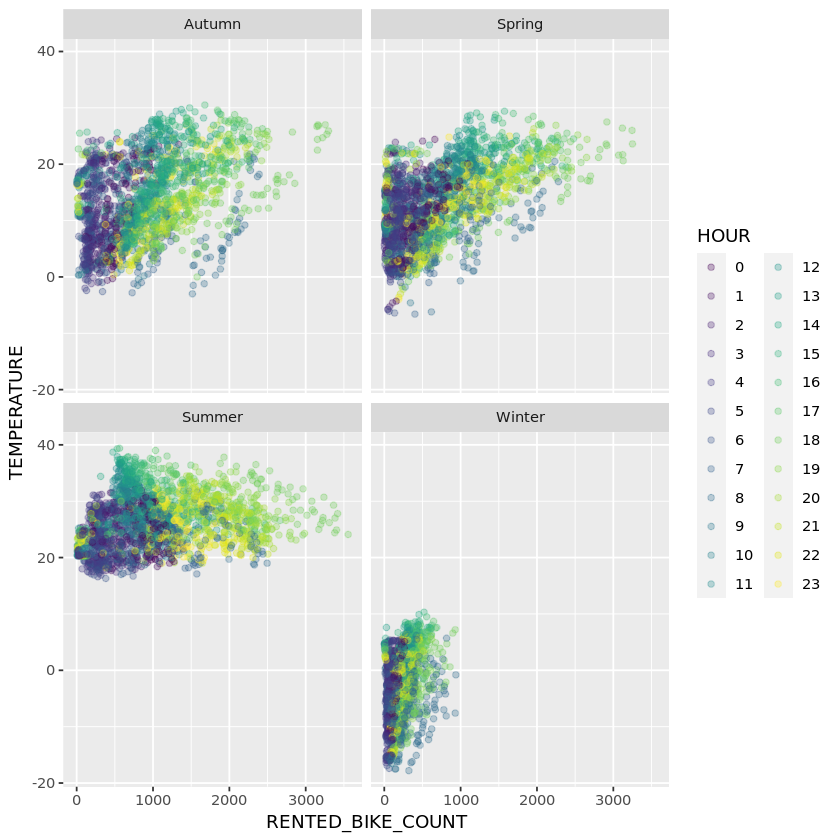

In [23]:
# provide your solution here
ggplot(seoul_bike_sharing, aes(x = RENTED_BIKE_COUNT, y=TEMPERATURE)) +
        geom_point(aes(color = HOUR), alpha = 0.3)+
        facet_wrap(~SEASONS)

### Ungraded Task: Describe the patterns you see. 
What do these patterns imply about the relationships between these variables? Keep your findings for your presentation in the final project.


In [24]:
People tend to stop renting bikes when the temperature goes above 30 degrees.
The ideal temperature for bike rentals in between 20 and 30 degrees.
Although there are fewer rentals during the winter, the temperature has a direct impact on the number of rentals: warmer temperatures yield higher numbers.

ERROR: Error in parse(text = x, srcfile = src): <text>:1:8: unexpected symbol
1: People tend
           ^


<details><summary>Click here for a solution</summary>
    
Visually, we can see some strong correlations as approximately linear patterns.  


Comparing this plot to the same plot below, but without grouping by `SEASONS`, shows how important seasonality is in explaining bike rental counts.  


In [ ]:
ggplot(seoul_bike_sharing) +
   geom_point(aes(x=TEMPERATURE,y=RENTED_BIKE_COUNT,colour=HOUR),alpha=1/5)

## Outliers (boxplot)
### Task 14 - Create a display of four boxplots of `RENTED_BIKE_COUNT` vs. `HOUR` grouped by `SEASONS`.
Use `facet_wrap` to generate four plots corresponding to the seasons.

### Solution 14


In [26]:
# provide your solution here
install.packages("plotly")
library(plotly)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


ERROR: Error: package or namespace load failed for ‘plotly’ in loadNamespace(i, c(lib.loc, .libPaths()), versionCheck = vI[[i]]):
 namespace ‘htmltools’ 0.4.0 is already loaded, but >= 0.5.4 is required


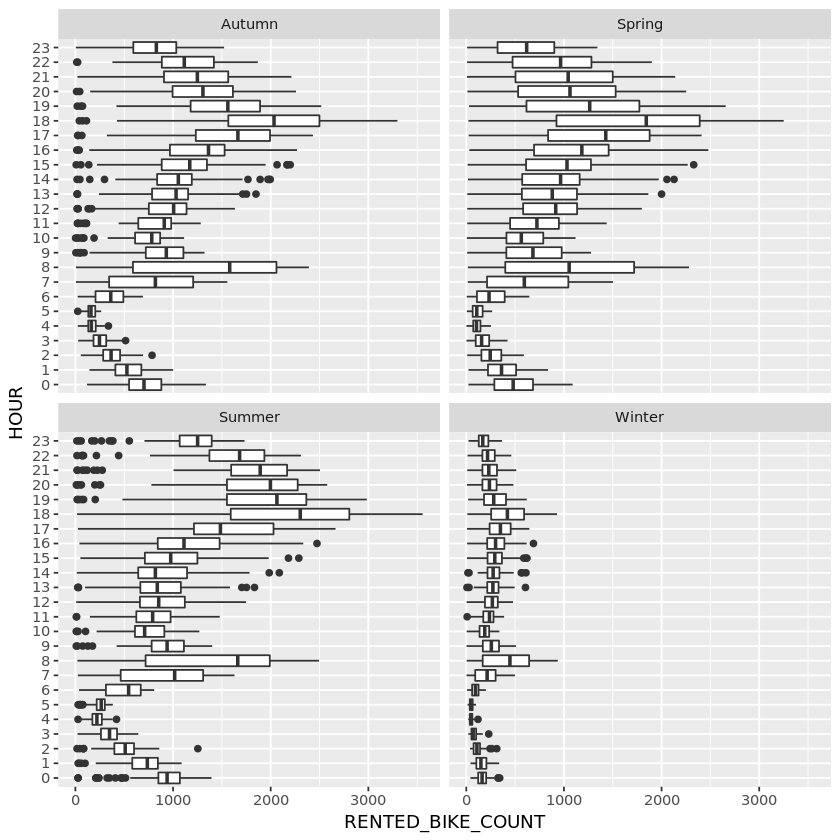

In [27]:
ggplot(seoul_bike_sharing, aes(x = RENTED_BIKE_COUNT, y = HOUR)) +
    geom_boxplot() +
    facet_wrap(~SEASONS)


### Ungraded Task: Compare and contrast the key features of these boxplots between seasons.
At this point, a story should be taking shape. Again, keep your findings for your presentation in the final project. 


<details><summary>Click here for a solution</summary>
    
Although the overall scale of bike rental counts changes with the seasons, key features remain very similar.  
For example, peak demand times are the same across all seasons, at 8 am and 6 pm.  


### Task 15 - Group the data by `DATE`, and use the summarize() function to calculate the daily total rainfall and snowfall.
Also, go ahead and plot the results if you wish.
### Solution 15


In [39]:
# provide your solution here
seoul_daily_rainfall_snowfall<-seoul_bike_sharing %>% group_by (DATE) %>% summarize(DAILY_TOTAL_RAINFALL = sum(RAINFALL), DAILY_TOTAL_SNOWFALL = sum(SNOWFALL))
seoul_daily_rainfall_snowfall                                                                    

DATE,DAILY_TOTAL_RAINFALL,DAILY_TOTAL_SNOWFALL
<date>,<dbl>,<dbl>
2017-12-01,0.0,0.0
2017-12-02,0.0,0.0
2017-12-03,4.0,0.0
2017-12-04,0.1,0.0
2017-12-05,0.0,0.0
2017-12-06,1.3,8.6
2017-12-07,0.0,10.4
2017-12-08,0.0,0.0
2017-12-09,0.0,0.0


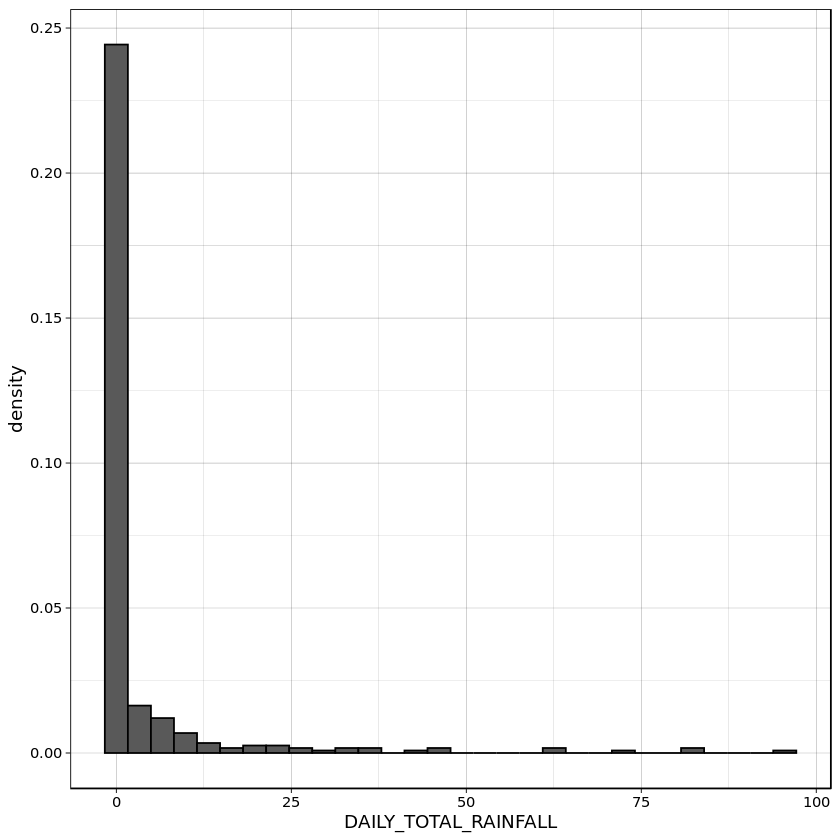

In [40]:
ggplot(seoul_daily_rainfall_snowfall, aes(x=DAILY_TOTAL_RAINFALL ), alpha=0.5 )  + geom_histogram(bins=30, col="black",
          aes(y=..density..)) +theme_linedraw()

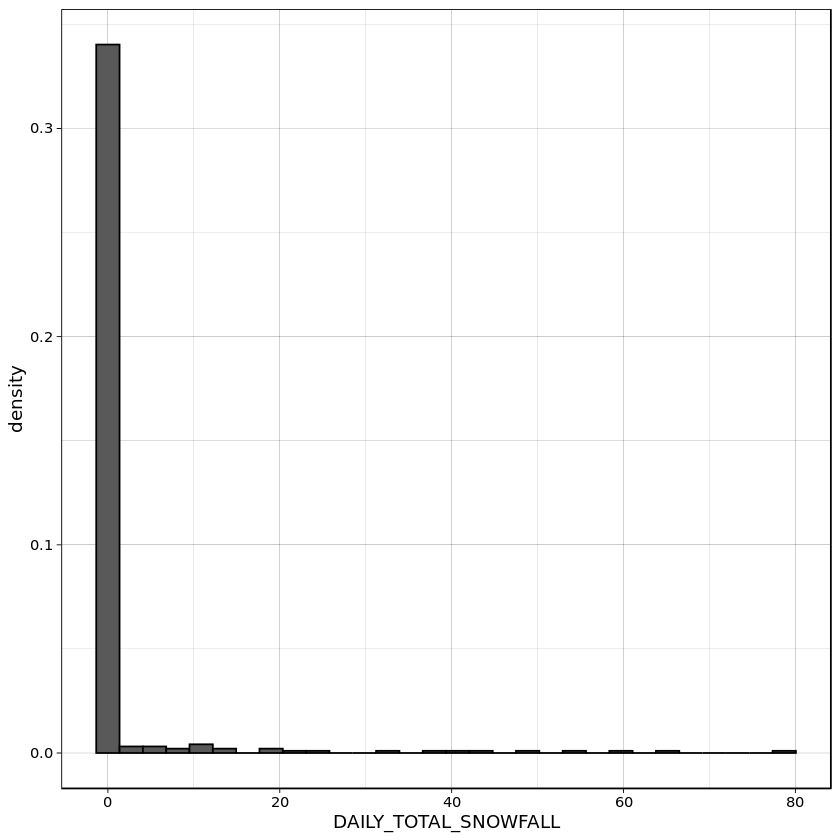

In [41]:
ggplot(seoul_daily_rainfall_snowfall, aes(x=DAILY_TOTAL_SNOWFALL ), alpha=0.5 )  + geom_histogram(bins=30, col="black",
          aes(y=..density..)) +theme_linedraw()

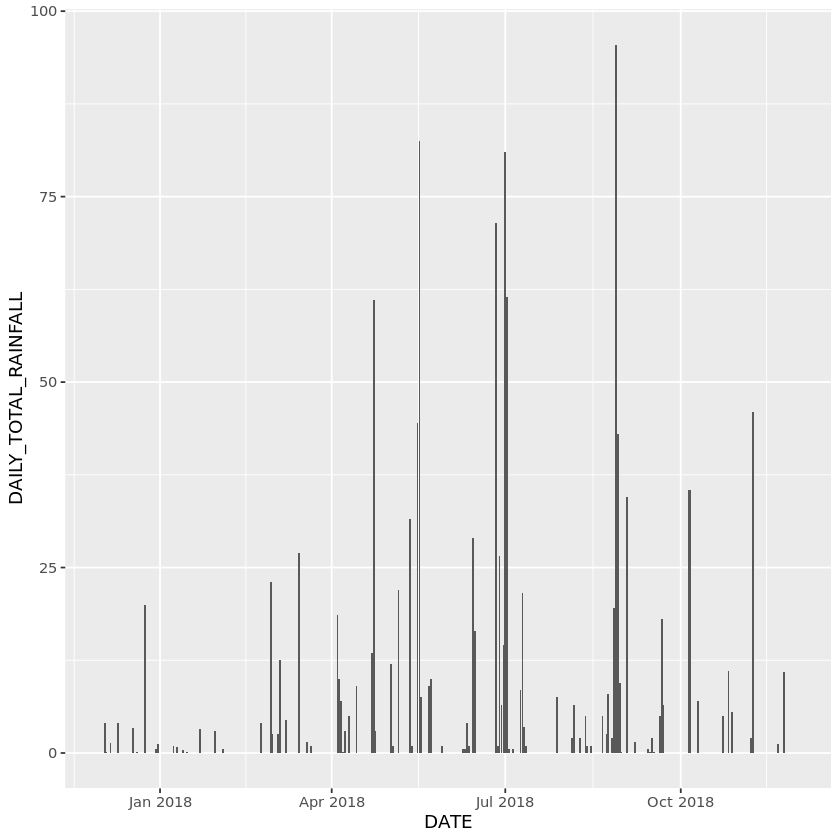

In [42]:
ggplot(seoul_daily_rainfall_snowfall, aes(x=DATE, y=DAILY_TOTAL_RAINFALL)) + 
  geom_bar(stat = "identity")

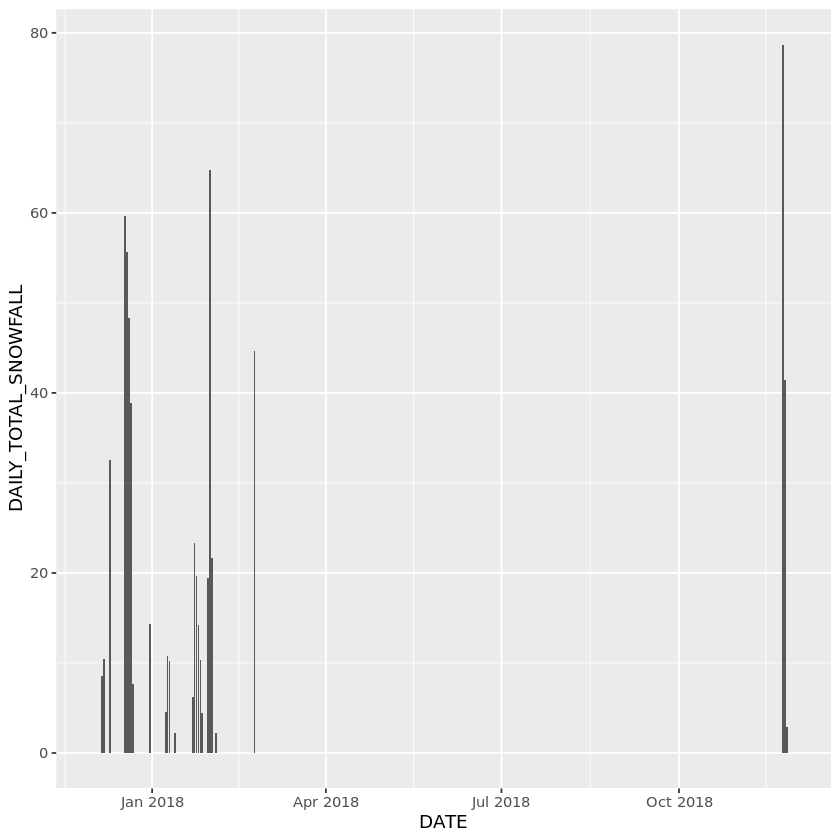

In [43]:
ggplot(seoul_daily_rainfall_snowfall, aes(x=DATE, y=DAILY_TOTAL_SNOWFALL)) + 
  geom_bar(stat = "identity")

### Task 16 - Determine how many days had snowfall.
### Solution 16


In [44]:
head(seoul_daily_rainfall_snowfall)
filter(seoul_daily_rainfall_snowfall, DAILY_TOTAL_SNOWFALL>0) %>% count()

DATE,DAILY_TOTAL_RAINFALL,DAILY_TOTAL_SNOWFALL
<date>,<dbl>,<dbl>
2017-12-01,0.0,0.0
2017-12-02,0.0,0.0
2017-12-03,4.0,0.0
2017-12-04,0.1,0.0
2017-12-05,0.0,0.0
2017-12-06,1.3,8.6


n
<int>
27


There are many more visualizations we could have chosen to cover here, but the important thing was that you deepen your understanding of the dataset.  
I hope we succeeded in that endeavour! 

(Keep going, you are getting closer to the finish line with each step you take. :-) )


## Further Reading
[1] 'Causal Model' (2021) _Wikipedia_. Available at "https://en.wikipedia.org/wiki/Causal_model" (Accessed: 22 April 2021).


## Author(s)

<h4> Jeff Grossman </h4>

## Contributor(s)

<h4> Yan Luo, Rav Ahuja </h4>

## Change log

| Date       | Version | Changed by    | Change Description                                                                                          |
| ---------- | ------- | ------------- | ----------------------------------------------------------------------------------------------------------- |
| 2021-05-04 | 0.4     | Jeff Grossman | Remove solutions                                                                                           |
| 2021-04-23 | 0.3     | Jeff Grossman | Update per review                                                                                           |
| 2021-04-20 | 0.2     | Jeff Grossman | Push for peer review                                                                                        | 
| 2021-04-05 | 0.1     | Jeff Grossman | Start content creation                                                                                    |


## <h3 align="center"> © IBM Corporation 2021. All rights reserved. <h3/>
